In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy.integrate import solve_ivp
from load_data import load_data

In [22]:
data = load_data("bianconi-barabasi_10000_5")

Loading dataset: Completed!


In [23]:
data

run                                  0                             1         \
compartment                           S     E     I     R     D     S     E   
reaction fear     feedback t                                                  
none     none     none     0.000   9998     0     2     0     0  9998     0   
                           0.125   9998     0     2     0     0  9998     0   
                           0.250   9998     0     2     0     0  9998     0   
                           0.375   9998     0     2     0     0  9998     0   
                           0.500   9998     0     2     0     0  9998     0   
...                                 ...   ...   ...   ...   ...   ...   ...   
cut      anticorr all      86.125  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           86.250  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           86.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           86.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           86.625  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

run                                                  ...    98              \
compartment                           I     R     D  ...     S     E     I   
reaction fear     feedback t                         ...                     
none     none     none     0.000      2     0     0  ...  9998     0     2   
                           0.125      2     0     0  ...  9998     0     2   
                           0.250      2     0     0  ...  9998     0     2   
                           0.375      2     0     0  ...  9998     0     2   
                           0.500      2     0     0  ...  9998     0     2   
...                                 ...   ...   ...  ...   ...   ...   ...   
cut      anticorr all      86.125  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           86.250  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           86.375  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           86.500  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           86.625  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   

run                                              99                          
compartment                           R     D     S     E     I     R     D  
reaction fear     feedback t                                                 
none     none     none     0.000      0     0  9998     0     2     0     0  
                           0.125      0     0  9998     0     1     1     0  
                           0.250      0     0  9998     0     1     1     0  
                           0.375      0     0  9998     0     1     1     0  
                           0.500      0     0  9998     0     1     1     0  
...                                 ...   ...   ...   ...   ...   ...   ...  
cut      anticorr all      86.125  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           86.250  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           86.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           86.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           86.625  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[56277 rows x 500 columns]

In [24]:
I_no_feedback = data.xs(("none","none","none"), level=[0,1,2]).xs("I",axis=1,level="compartment")
I_no_feedback

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.125,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
0.250,2,2,1,1,2,1,2,2,2,2,...,2,2,2,1,2,2,2,2,2,1
0.375,2,2,1,1,2,1,2,2,2,2,...,3,2,2,1,1,2,2,2,2,1
0.500,2,2,1,1,2,1,2,2,1,2,...,3,2,3,1,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86.125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
86.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
86.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [25]:
def SEIR(t, y, beta, mu, gamma):
    dSdt = -beta*y[0]*y[2]
    dEdt = beta*y[0]*y[2] - mu*y[1]
    dIdt = mu*y[1] - gamma*y[2]
    dRdt = gamma*y[2]
    return np.array([dSdt,dEdt,dIdt,dRdt])

y0 = np.array([10000-2,0,2,0]) / 10000
results = solve_ivp(SEIR, (0,I_no_feedback.index.max()), y0, args=(1/2*5,1/2,1/6), t_eval=I_no_feedback.index)

I = results.y[2] * 10000
t = results.t

In [26]:
list_series = {}
argmax_det = t[np.argmax(I)]
max_det = np.max(I)
for col in I_no_feedback:
    series = I_no_feedback[col].copy()
    series.index = series.index - series.idxmax() + argmax_det
    series = series / series.max() * max_det
    list_series[col] = series
traslated_no_feedback = pd.concat(list_series, axis=1).sort_index()
traslated_no_feedback

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
-9.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,16.834364
-9.125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.417182
-9.000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.417182
-8.875,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.417182
-8.750,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.417182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
98.500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
98.625,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


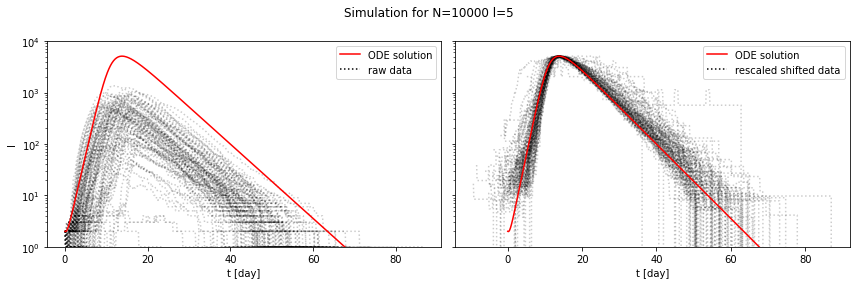

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.suptitle("Simulation for N=10000 l=5")
line1 = Line2D([0,1],[0,1], color="r")
line2 = Line2D([0,1],[0,1], linestyle=":", color="k")

I_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[0])
axs[0].plot(t,I, color="r")
axs[0].set_ylim([1,2*I_no_feedback.max().max()])
axs[0].set_xlabel("t [day]")
axs[0].set_ylabel("I")
axs[0].set_yscale("log")
axs[0].set_ylim([1,max(I)*2])
axs[0].legend(handles=[line1,line2], labels=["ODE solution", "raw data"])

traslated_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[1])
axs[1].plot(t,I, color="r")
axs[1].set_xlabel("t [day]")
axs[1].set_yscale("log")
axs[1].legend(handles=[line1,line2], labels=["ODE solution", "rescaled shifted data"])

fig.tight_layout()
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l5.pdf")
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l5.png")

In [8]:
data = load_data("bianconi-barabasi_10000_10")

Loading dataset: Completed!


In [9]:
data

run                                  0                             1         \
compartment                           S     E     I     R     D     S     E   
reaction fear     feedback t                                                  
none     none     none     0.000   9998     0     2     0     0  9998     0   
                           0.125   9998     0     2     0     0  9998     0   
                           0.250   9998     0     2     0     0  9998     0   
                           0.375   9998     0     2     0     0  9998     0   
                           0.500   9998     0     2     0     0  9998     0   
...                                 ...   ...   ...   ...   ...   ...   ...   
cut      anticorr all      84.125  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           84.250  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           84.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           84.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           84.625  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

run                                                  ...    98              \
compartment                           I     R     D  ...     S     E     I   
reaction fear     feedback t                         ...                     
none     none     none     0.000      2     0     0  ...  9998     0     2   
                           0.125      2     0     0  ...  9998     0     2   
                           0.250      2     0     0  ...  9998     0     2   
                           0.375      2     0     0  ...  9998     0     2   
                           0.500      2     0     0  ...  9998     0     2   
...                                 ...   ...   ...  ...   ...   ...   ...   
cut      anticorr all      84.125  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           84.250  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           84.375  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           84.500  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           84.625  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   

run                                              99                          
compartment                           R     D     S     E     I     R     D  
reaction fear     feedback t                                                 
none     none     none     0.000      0     0  9998     0     2     0     0  
                           0.125      0     0  9997     1     2     0     0  
                           0.250      0     0  9997     1     2     0     0  
                           0.375      0     0  9997     1     2     0     0  
                           0.500      0     0  9997     1     2     0     0  
...                                 ...   ...   ...   ...   ...   ...   ...  
cut      anticorr all      84.125  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           84.250  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           84.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           84.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           84.625  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[58786 rows x 500 columns]

In [10]:
I_no_feedback = data.xs(("none","none","none"), level=[0,1,2]).xs("I",axis=1,level="compartment")
I_no_feedback

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.125,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
0.250,2,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,3,2,2,2
0.375,2,2,2,2,2,2,2,1,2,1,...,1,2,2,2,2,1,3,2,2,2
0.500,2,2,2,2,2,2,2,1,2,1,...,1,2,1,2,2,1,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
84.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
84.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [15]:
def SEIR(t, y, beta, mu, gamma):
    dSdt = -beta*y[0]*y[2]
    dEdt = beta*y[0]*y[2] - mu*y[1]
    dIdt = mu*y[1] - gamma*y[2]
    dRdt = gamma*y[2]
    return np.array([dSdt,dEdt,dIdt,dRdt])

y0 = np.array([10000-2,0,2,0]) / 10000
results = solve_ivp(SEIR, (0,I_no_feedback.index.max()), y0, args=(1/2*10,1/2,1/6), t_eval=I_no_feedback.index)

I = results.y[2] * 10000
t = results.t

In [16]:
list_series = {}
argmax_det = t[np.argmax(I)]
max_det = np.max(I)
for col in I_no_feedback:
    series = I_no_feedback[col].copy()
    series.index = series.index - series.idxmax() + argmax_det
    series = series / series.max() * max_det
    list_series[col] = series
traslated_no_feedback = pd.concat(list_series, axis=1).sort_index()
traslated_no_feedback

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
-11.750,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
-11.625,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
-11.500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
-11.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
-11.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88.125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
88.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
88.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


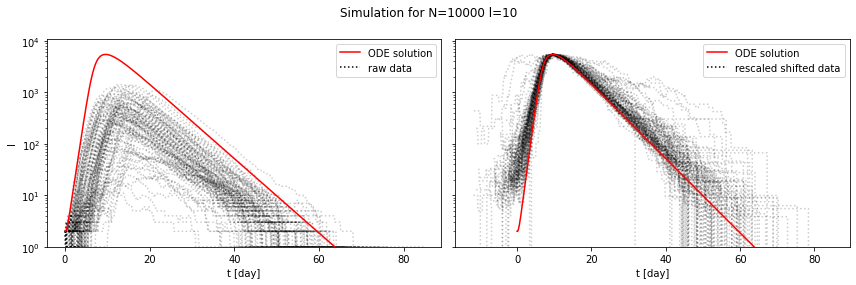

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.suptitle("Simulation for N=10000 l=10")
line1 = Line2D([0,1],[0,1], color="r")
line2 = Line2D([0,1],[0,1], linestyle=":", color="k")

I_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[0])
axs[0].plot(t,I, color="r")
axs[0].set_ylim([1,2*I_no_feedback.max().max()])
axs[0].set_xlabel("t [day]")
axs[0].set_ylabel("I")
axs[0].set_yscale("log")
axs[0].set_ylim([1,max(I)*2])
axs[0].legend(handles=[line1,line2], labels=["ODE solution", "raw data"])

traslated_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[1])
axs[1].plot(t,I, color="r")
axs[1].set_xlabel("t [day]")
axs[1].set_yscale("log")
axs[1].legend(handles=[line1,line2], labels=["ODE solution", "rescaled shifted data"])

fig.tight_layout()
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l10.pdf")
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l10.png")

R0 = 30.0


(0.1, 100000000.0)

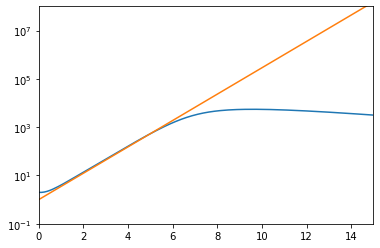

In [21]:
plt.plot(t,I)
plt.yscale("log")
b, s, g = 1/2*10, 1/2, 1/6
lambd = 1/2 * (-s - g + np.sqrt((s - g)**2 + 4 * s * b))
print(f"R0 = {(lambd+s)*(lambd+g)/s/g}")
def f(x):
    return np.exp(lambd * x)
plt.plot(t,f(t))
plt.xlim([0,15])
plt.ylim([1e-1,1e8])